This pipeline helps in iterative incremental prediction of using features by import
4 datasets of ranked features were evaluted
1.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap 
import numpy as np

Install scikit-learn

In [3]:
data = pd.read_csv("Data/All_data.csv")


Dataset

In [4]:
df_HFR_NO_FE=df_HFR_combined=pd.read_csv("Data/All_data.csv")
df_HFR_combined=pd.read_csv("Data/hmf_ranked.csv") #ranked features by HMF
df_HFR_mi=pd.read_csv("Data/mi_ranked_data.csv")    #Rnaked feeatures by mutual information
df_HFR_F=pd.read_csv("Data/f_regression_ranked_data.csv")#Ranked feeatures by f regression
df_HFR_cost=pd.read_csv("Data/cost_ranked_data.csv")


#Adding the yield column

In [5]:
df_HFR_NO_FE["Yield"]=data['Yield']

In [6]:
df_HFR_combined["Yield"]=data['Yield']

In [7]:
df_HFR_mi["Yield"]=data['Yield']

In [8]:
df_HFR_F["Yield"]=data['Yield']

In [9]:
df_HFR_cost["Yield"]=data['Yield']

Datatypes

Encoding

In [10]:
ec=LabelEncoder()


In [11]:
df_HFR_NO_FE["CRP"]=ec.fit_transform(df_HFR_NO_FE["CRP"])

In [12]:
df_HFR_combined["CRP"]=ec.fit_transform(df_HFR_combined["CRP"])

In [13]:
df_HFR_mi["CRP"]=ec.fit_transform(df_HFR_mi["CRP"])

In [14]:
df_HFR_F["CRP"]=ec.fit_transform(df_HFR_F["CRP"])

In [15]:
df_HFR_cost["CRP"]=ec.fit_transform(df_HFR_cost["CRP"])

Define features columns and Target Variable

In [16]:
#X=df_HFR.drop(["Yield"],axis=1)
Y=df_HFR_NO_FE["Yield"]

In [17]:
X_df_HFR_NO_FE=df_HFR_NO_FE.drop(columns=['District', 'Center','preciptype','VIS',"Yield"],axis=1)

In [18]:
X_df_HFR_combined=df_HFR_combined.drop(["Yield"],axis=1)

In [19]:
X_df_HFR_mi=df_HFR_mi.drop(["Yield"],axis=1)

In [20]:
X_df_HFR_F=df_HFR_F.drop(["Yield"],axis=1)

In [21]:
X_df_HFR_cost=df_HFR_cost.drop(columns=['preciptype','VIS',"Yield"],axis=1)

In [22]:
#X2=(X.iloc[:,0:19])

In [23]:
#X1=X.drop("TN",axis=1)

In [24]:
X1_df_HFR_NO_FE=X_df_HFR_NO_FE.iloc[:,0:49]

In [25]:
X1_df_HFR_combined=X_df_HFR_combined.iloc[:,0:50]

In [26]:
X1_df_HFR_mi=X_df_HFR_mi.iloc[:,0:50]

In [27]:
X1_df_HFR_F=X_df_HFR_F.iloc[:,0:50]

In [28]:
X1_df_HFR_cost=X_df_HFR_cost.iloc[:,0:50]

In [29]:
#X1_df_HFR_NO_FE

In [30]:
#X1_df_HFR_combined

In [31]:
#X1_df_HFR_mi

In [32]:
#X1_df_HFR_F

In [33]:
#X1_df_HFR_cost

Predicting using features identified by five methods:

In [34]:
#X1=df_HFR[["SLT","N","TN","CLY","LAT","ST10","BDN","CEC","P","MAP","ELV","ST04","CRP","K","MON","WDIR"]]

Predicting using fetaures Identified by SHAP

In [35]:
#X1=data[["N","ST01","K","P","T0","LAT","CRP","BDN","CLY","WGST","MAP","WDIR","SLT","ELV","CLDC","S04","CEC","ST10","SMV10","WSPD"]]

In [36]:
#X1["CRP"]=ec.fit_transform(X1["CRP"])

Prediting using features idenfified by LIME

In [37]:
#X1=data[["N", "WGST", "BDN", "ST01", "LONG", "K", "WDIR", "DEW", "T0", "SND", "P", "ELV", "MAP", "ST10", "FL", "LAT", "CLDC", "WSPD", "ST20", "SM01"]]

Split the dataset

In [38]:
X1_df_HFR_NO_FE_train,X1_df_HFR_NO_FE_test,Y_train,Y_test=train_test_split(X1_df_HFR_NO_FE,Y,test_size=.3,random_state=0)

In [39]:
X1_df_HFR_combined,X1_df_HFR_combined_test,Y_train,Y_test=train_test_split(X1_df_HFR_combined,Y,test_size=.3,random_state=0)

In [40]:
X1_df_HFR_mi_train,X1_df_HFR_mi_test,Y_train,Y_test=train_test_split(X1_df_HFR_mi,Y,test_size=.3,random_state=0)

In [41]:
X1_df_HFR_F_train,X1_df_HFR_F_test,Y_train,Y_test=train_test_split(X1_df_HFR_F,Y,test_size=.3,random_state=0)

In [42]:
X1_df_HFR_cost_train,X1_df_HFR_cost_test,Y_train,Y_test=train_test_split(X1_df_HFR_cost,Y,test_size=.3,random_state=0)

Making prediction with Random forest and different feattures

In [43]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
Model1_df_HFR_NO_FE=RF.fit(X1_df_HFR_NO_FE_train,Y_train)
Y_Pred_df_HFR_NO_FE=Model1_df_HFR_NO_FE.predict(X1_df_HFR_NO_FE_test)

In [44]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
Model1_df_HFR_combined=RF.fit(X1_df_HFR_combined,Y_train)
Y_Pred_df_HFR_combined=Model1_df_HFR_combined.predict(X1_df_HFR_combined_test)

In [45]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
Model1_df_HFR_mi=RF.fit(X1_df_HFR_mi_train,Y_train)
Y_Pred_df_HFR_mi=Model1_df_HFR_mi.predict(X1_df_HFR_mi_test)

In [46]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
Model1_df_HFR_F=RF.fit(X1_df_HFR_F_train,Y_train)
Y_Pred_df_HFR_F=Model1_df_HFR_F.predict(X1_df_HFR_F_test)

In [47]:
RF=RandomForestRegressor(n_estimators=100,random_state=0)
Model1_df_HFR_cost=RF.fit(X1_df_HFR_cost_train,Y_train)
Y_Pred_df_HFR_cost=Model1_df_HFR_cost.predict(X1_df_HFR_cost_test)

Evaluating the model

In [48]:
mse_df_HFR_NO_FE=mean_squared_error(Y_test,Y_Pred_df_HFR_NO_FE)
r2_df_HFR_NO_FE=r2_score(Y_test,Y_Pred_df_HFR_NO_FE)

In [49]:
mse_df_HFR_combined=mean_squared_error(Y_test,Y_Pred_df_HFR_combined)
r2_df_HFR_combined=r2_score(Y_test,Y_Pred_df_HFR_combined)

In [50]:
mse_df_HFR_mi=mean_squared_error(Y_test,Y_Pred_df_HFR_mi)
r2_df_HFR_mi=r2_score(Y_test,Y_Pred_df_HFR_mi)

In [51]:
mse_df_HFR_F=mean_squared_error(Y_test,Y_Pred_df_HFR_F)
r2_df_HFR_F=r2_score(Y_test,Y_Pred_df_HFR_F)

In [52]:
mse_df_HFR_cost=mean_squared_error(Y_test,Y_Pred_df_HFR_cost)
r2_df_HFR_cost=r2_score(Y_test,Y_Pred_df_HFR_cost)

Error MSE

In [53]:
print("mse_df_HFR_NO_FE",mse_df_HFR_NO_FE)
#r2

mse_df_HFR_NO_FE 1.3670766833059364e-12


In [54]:
print("mse_df_HFR_combined:",mse_df_HFR_combined)

mse_df_HFR_combined: 1.3711428464796726e-12


In [55]:
print("mse_df_HFR_mi:",mse_df_HFR_mi)

mse_df_HFR_mi: 1.3269824202554142e-12


In [56]:
print("mse_df_HFR_F:",mse_df_HFR_F)

mse_df_HFR_F: 1.3915596226737237e-12


In [57]:
print("mse_df_HFR_cost:",mse_df_HFR_cost)

mse_df_HFR_cost: 1.3571377638054495e-12


COFFICIENT r2

In [58]:
print("r2_df_HFR_NO_FE:",r2_df_HFR_NO_FE)

r2_df_HFR_NO_FE: 0.8861402120909857


In [59]:
print("r2_df_HFR_combined:",r2_df_HFR_combined)

r2_df_HFR_combined: 0.8858015533440269


In [60]:
print("r2_df_HFR_mi:",r2_df_HFR_mi)

r2_df_HFR_mi: 0.8894795450947943


In [61]:
print("r2_df_HFR_F:",r2_df_HFR_F)

r2_df_HFR_F: 0.8841011002270746


In [62]:
print("r2_df_HFR_cost:",r2_df_HFR_cost)

r2_df_HFR_cost: 0.8869679954042331


Plotting the accumlated evaluation score

In [63]:
#pip install shap

In [64]:
#Model explanantion by SHAP

In [65]:
import shap

In [66]:
#HAP Explainer based  trained model(ALL FEATURES)
explainer = shap.TreeExplainer(Model1_df_HFR_NO_FE)

In [67]:
#SHAP values 
#shap_values = explainer.shap_values(X1_df_HFR_NO_FE_test)
explainer = shap.TreeExplainer(Model1_df_HFR_NO_FE)
shap_values = explainer.shap_values(X1_df_HFR_NO_FE_train)

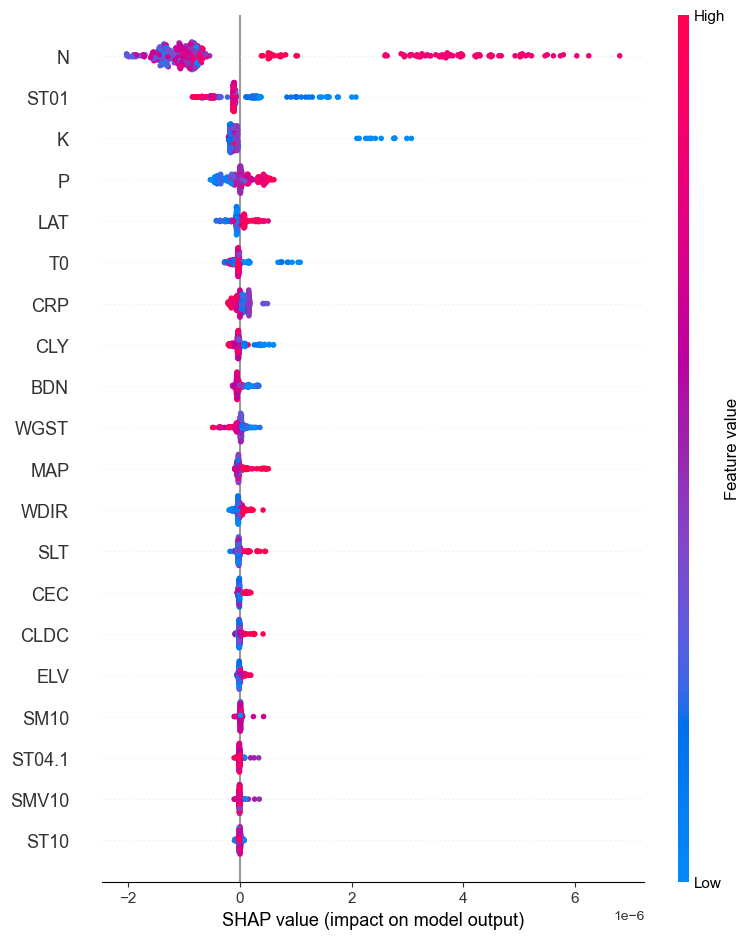

In [68]:
#Visualize SHAP explanations
shap.summary_plot(shap_values, X1_df_HFR_NO_FE_train)

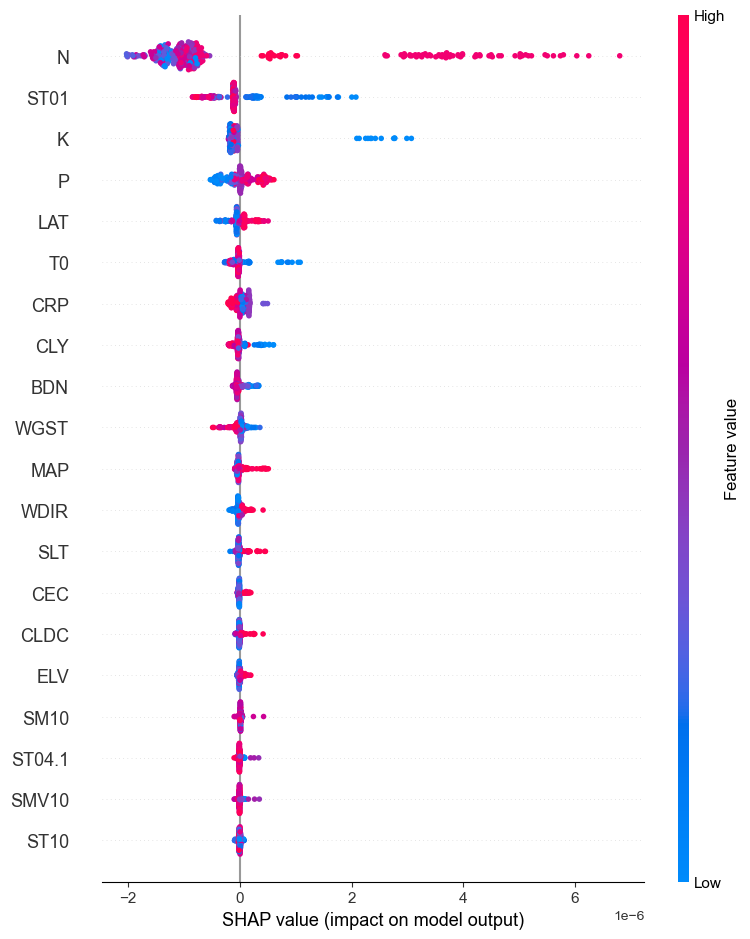

In [69]:
import shap
import matplotlib.pyplot as plt

shap.summary_plot(shap_values, X1_df_HFR_NO_FE_train)
fig = plt.gcf()
fig.set_size_inches(6.85, 8)
fig.savefig("Fig7.pdf", format="pdf", bbox_inches="tight")
plt.close()

In [70]:
#pip install --upgrade shap

In [71]:
import matplotlib
# Set the backend *before* importing pyplot or creating any figures
# 'Agg' is a common non-interactive backend for PNG, JPG, EPS, PDF etc.
matplotlib.use('Agg')

import shap
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd



# Set font and size for consistency and publication readiness
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 10
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 10
rcParams['axes.titlesize'] = 12

# --- CRITICAL for EPS/PDF font embedding (still important for file quality) ---
rcParams['ps.fonttype'] = 42 # For PostScript (EPS)
rcParams['pdf.fonttype'] = 42 # For PDF (good to set if you ever switch or for LaTeX)

# --- Figure creation and plotting ---
# Although using plt.gcf() works, being explicit can sometimes be clearer
fig, ax = plt.subplots(figsize=(6.85, 8)) # Create figure and axes explicitly

# Plot the SHAP summary onto the created axes
# shap.summary_plot can often take an ax argument to plot onto specific axes
# However, for summary_plot, it usually draws on the current figure directly.
# If you don't pass an ax, it uses gcf/gca, which is fine here since it's the *only* fig.
shap.summary_plot(shap_values, X1_df_HFR_NO_FE_train, show=False) # show=False is still good practice

# Add a title (if needed)
plt.title("SHAP Summary Plot")

# Save the figure to file
fig.savefig("Fig7.eps", format="eps", bbox_inches="tight")

# Close the figure
plt.close(fig) # Explicitly close the figure object

print("Figure saved successfully to Fig7.eps without displaying.")

Figure saved successfully to Fig7.eps without displaying.


SHAP FIGURE STEP BY STEP

1. Back-end Configuration for Saving
Make sure you're using a non-interactive backend like 'Agg' for EPS export:



In [72]:
import matplotlib
matplotlib.use('Agg')  # MUST be set before importing pyplot

2. Set Global Figure Parameters (Springer-Style)



In [73]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'     # Springer prefers Arial/Helvetica
rcParams['font.size'] = 10            # ~2.5 mm height is ~10 pt
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 10
rcParams['ps.fonttype'] = 42          # Embed fonts in EPS
rcParams['pdf.fonttype'] = 42

Create and Save SHAP Summary Plot with Lettering

In [74]:
import shap

# Disable interactive display (important when using matplotlib.use('Agg'))
shap.summary_plot(shap_values, X1_df_HFR_NO_FE_train, show=False)

# Get the current figure
fig = plt.gcf()
fig.set_size_inches(6.85, 8)  # ~174mm width (single column), <234mm height

# Add a figure label (e.g., 'a') at top-left
#fig.text(0.01, 0.99, '(a)', fontsize=12, fontweight='bold', va='top')

# Save as EPS (no titles or captions)
fig.savefig("Fig7.pdf", format='pdf', bbox_inches='tight', dpi=300)

plt.close(fig)
print("Saved Springer-compatible Fig7.eps")

Saved Springer-compatible Fig7.eps


In [75]:
#EPS PLOT OF SHAP
import shap
import shap
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd

# --- Font and Style Settings ---
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 10
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 10
rcParams['axes.titlesize'] = 12

# --- EPS/PDF Compatibility: Embed TrueType fonts ---
rcParams['pdf.fonttype'] = 42  # For PDF export
rcParams['ps.fonttype'] = 42   # For EPS export

# --- Plot SHAP Summary ---
plt.figure(figsize=(6.85, 8))  # Journal column width (6.85 in)

# Generate SHAP summary plot without showing it
shap.summary_plot(shap_values, X1_df_HFR_NO_FE_train, show=False)

# Add a descriptive title
plt.title("SHAP Feature Importance (Model X Explanations)")

# Save as EPS with embedded fonts
plt.savefig("Fig7x.eps", format="eps", bbox_inches="tight",pad_inches=0.1)

# Free memory
plt.close()

print("Figure saved successfully as Fig7.eps with proper font embedding.")


Figure saved successfully as Fig7.eps with proper font embedding.


In [76]:
import shap
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Font and export settings
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 10
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

# Plot in grayscale
plt.figure(figsize=(6.85, 8))  # standard journal width
shap.summary_plot(
    shap_values, 
    X1_df_HFR_NO_FE_train, 
    show=False, 
    color=plt.get_cmap("Greys")
)

# Optional: remove title from plot area
plt.title("")  # remove in-plot title (caption goes in text)

# Save as EPS
plt.savefig("Fig7_grayscale.pdf", format="pdf", bbox_inches="tight", pad_inches=0.1)
plt.close()


In [77]:
#LIME EXPLANATION

In [78]:
import lime
from lime import lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X1_df_HFR_NO_FE_train),
    feature_names=X1_df_HFR_NO_FE_train.columns,
    class_names=['prediction'],  # Even for regression, LIME expects class names
    mode='regression'
)

# Let's pick a specific instance from your test set to explain
instance_to_explain = X1_df_HFR_NO_FE_train.iloc[0] # Or any other instance

# Explain the prediction for this instance
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=Model1_df_HFR_NO_FE.predict,
    num_features=len(X1_df_HFR_NO_FE_train.columns) # Number of features to show
)

# Visualize the explanation
explanation.show_in_notebook(show_table=True, show_all=False) # For Jupyter notebooks

# --- If you want a matplotlib plot (more control) ---
feature_names = [name for name, _ in explanation.as_list()]
feature_values = [value for _, value in explanation.as_list()]
colors = ['green' if value > 0 else 'red' for _, value in explanation.as_list()]

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_values, color=colors)
plt.xlabel('Contribution to Prediction')
plt.ylabel('Feature')
plt.title(f'LIME Explanation for Instance (Index 0)')
plt.gca().invert_yaxis() # To have the most important feature at the top
plt.grid(axis='x', linestyle='--')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

C:\Program Files\KMSpico\temp\ipykernel_18608\220425160.py:36: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Fig.8 LIME Explanantion

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from lime import lime_tabular
from matplotlib import rcParams

# Springer-compliant font setup
rcParams['font.family'] = 'Arial'
rcParams['font.size'] = 10
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['axes.titlesize'] = 10  # Even if not used

# LIME explainer setup
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X1_df_HFR_NO_FE_train),
    feature_names=X1_df_HFR_NO_FE_train.columns.tolist(),
    class_names=['prediction'],
    mode='regression'
)

# Select one instance to explain
instance_to_explain = X1_df_HFR_NO_FE_train.iloc[49]

# Get explanation
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=Model1_df_HFR_NO_FE.predict,
    num_features=len(X1_df_HFR_NO_FE_train.columns)
)

# Extract top 20 features by importance
feature_importance = explanation.as_list()
top_20 = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)[:20]
names = [name for name, _ in top_20]
values = [value for _, value in top_20]
colors = ['green' if val > 0 else 'red' for val in values]

# Plot — clean, no title, proper size
plt.figure(figsize=(6.85, 8))  # ~84 mm wide, Springer 1-column
plt.barh(top_20_feature_names, top_20_feature_values, color=colors)
plt.xlabel('LIME value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', linewidth=0.5)

# ✅ Remove figure title for Springer compliance
# plt.title('Top 20 Features Based on LIME Explanation')  ← Remove this

# ✅ Save with correct format and bounding
plt.tight_layout()
plt.savefig("Fig8.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.close()

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wit

NameError: name 'top_20_feature_names' is not defined

In [ ]:
plt.savefig("Fig8.eps", format="eps", bbox_inches="tight")
plt.close()

In [ ]:
#The Plot of the Framework

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font and size (Arial, 10 pt)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10

plt.figure(figsize=(12, 6))

# --- Left subplot: Raw distributions (no transparency) ---
plt.subplot(1, 2, 1)
sns.kdeplot(features_df['Information_Gain'], fill=True, color='blue', label="MI")
sns.kdeplot(features_df['F_Score'], fill=True, color='green', label="FR")
plt.xlabel('Raw Score')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='x', linestyle='--', linewidth=0.5)

# --- Right subplot: Normalized distributions (no transparency) ---
plt.subplot(1, 2, 2)
sns.kdeplot(features_df['Normalized_MI'], fill=True, color='blue', label="Normalized MI")
sns.kdeplot(features_df['Normalized_F'], fill=True, color='green', label="Normalized FR")
sns.kdeplot(features_df['Combined_Score'], fill=True, color='red', label="Normalized HMF")
plt.xlabel('Normalized Score')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='x', linestyle='--', linewidth=0.5)

plt.tight_layout()

# Save EPS without title in figure area, vector format, no transparency
plt.savefig("FigX.eps", format="eps", bbox_inches="tight")
plt.close()

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

# Create a new Digraph for the full process
full_flowchart = Digraph(format="pdf")
full_flowchart.attr(rankdir="TB", size="12", bgcolor="white")

# === Phase 1: Model Selection ===
full_flowchart.node("A", "Features subsets", shape="ellipse", style="filled", fillcolor="lightgray")

# Feature Subsets
full_flowchart.node("B1", "All Features Subset", shape="box")
full_flowchart.node("B2", "Subsets of x Features ", shape="box")
#full_flowchart.node("B3", "Subsets of 10 Features", shape="box")

# Models
full_flowchart.node("C", "Candidate Models:\nSVR, PLS, GB, RF, ANN", shape="ellipse", style="filled", fillcolor="lightblue")

# Training and Evaluation
full_flowchart.node("D", "Train & Evaluate on Each Subset", shape="box")
full_flowchart.node("E", "Track R² & MSE", shape="box")
full_flowchart.node("F", "Compare Model Performance", shape="box")
full_flowchart.node("G", "Select Best Model", shape="parallelogram", style="filled", fillcolor="lightgreen")

# Connections for Phase 1
full_flowchart.edge("A", "B1")
full_flowchart.edge("A", "B2")
#full_flowchart.edge("A", "B3")
full_flowchart.edge("B1", "C")
full_flowchart.edge("B2", "C")
#full_flowchart.edge("B3", "C")
full_flowchart.edge("C", "D")
full_flowchart.edge("D", "E")
full_flowchart.edge("E", "F")
full_flowchart.edge("F", "G")

# === Phase 2: Feature Evaluation using Best Model ===
full_flowchart.node("H", "Sort by Scores(MI, FR, HMF, Cost-Based)", shape="ellipse", style="filled", fillcolor="lightyellow")
full_flowchart.node("I", "Incremental Feature Addition", shape="ellipse", style="filled", fillcolor="lightgreen")
full_flowchart.node("J", "Train Best Model", shape="box")
full_flowchart.node("K", "Evaluate MSE & R²", shape="box")
full_flowchart.node("L", "Track Metrics", shape="ellipse", style="filled", fillcolor="yellow")
full_flowchart.node("M1", "Subset of Features", shape="box")
full_flowchart.node("M2", "MSE and R² Scores", shape="box")
full_flowchart.node("N", "Identify Performing Zone", shape="ellipse", style="filled", fillcolor="orange")
full_flowchart.node("O", "Compare Extraction Methods", shape="box")
full_flowchart.node("P", "Select Best Extraction Method", shape="parallelogram", style="filled", fillcolor="lightcoral")
full_flowchart.node("Q", "Final Output: Critical and Cost-Effective Features Subset", shape="parallelogram", style="filled", fillcolor="lightgray")

# Connections for Phase 2
#full_flowchart.edge("G", "H")
full_flowchart.edge("H", "I")
full_flowchart.edge("I", "J")
full_flowchart.edge("J", "K")
full_flowchart.edge("K", "I", label="Iterate")
full_flowchart.edge("I", "L")
full_flowchart.edge("L", "M1")
full_flowchart.edge("L", "M2")
full_flowchart.edge("L", "N")
full_flowchart.edge("N", "O")
full_flowchart.edge("O", "P")
full_flowchart.edge("P", "Q")

# Render and display the full flowchart
full_flowchart.render("full_feature_selection_flowchart")
#display(Image(filename="full_feature_selection_flowchart.pdf"))

In [ ]:
from graphviz import Digraph
from IPython.display import Image, display

# Create a new Digraph for the full process
full_flowchart = Digraph(format="pdf")
full_flowchart.attr(rankdir="TB", size="3.3", bgcolor="white")  # single-column width ~3.3 inches
full_flowchart.attr(fontname="Arial", fontsize="10")  # Set font to Arial and size to 10pt

# === Phase 1: Model Selection ===
full_flowchart.node("A", "Features subsets", shape="ellipse", style="filled", fillcolor="lightgray")

# Feature Subsets
full_flowchart.node("B1", "All Features Subset", shape="box")
full_flowchart.node("B2", "Subsets of x Features ", shape="box")
#full_flowchart.node("B3", "Subsets of 10 Features", shape="box")

# Models
full_flowchart.node("C", "Candidate Models:\nSVR, PLS, GB, RF, ANN", shape="ellipse", style="filled", fillcolor="lightblue")

# Training and Evaluation
full_flowchart.node("D", "Train & Evaluate on Each Subset", shape="box")
full_flowchart.node("E", "Track R² & MSE", shape="box")
full_flowchart.node("F", "Compare Model Performance", shape="box")
full_flowchart.node("G", "Select Best Model", shape="parallelogram", style="filled", fillcolor="lightgreen")

# Connections for Phase 1
full_flowchart.edge("A", "B1")
full_flowchart.edge("A", "B2")
#full_flowchart.edge("A", "B3")
full_flowchart.edge("B1", "C")
full_flowchart.edge("B2", "C")
#full_flowchart.edge("B3", "C")
full_flowchart.edge("C", "D")
full_flowchart.edge("D", "E")
full_flowchart.edge("E", "F")
full_flowchart.edge("F", "G")

# === Phase 2: Feature Evaluation using Best Model ===
full_flowchart.node("H", "Sort by Scores(MI, FR, HMF, Cost-Based)", shape="ellipse", style="filled", fillcolor="lightyellow")
full_flowchart.node("I", "Incremental Feature Addition", shape="ellipse", style="filled", fillcolor="lightgreen")
full_flowchart.node("J", "Train Best Model", shape="box")
full_flowchart.node("K", "Evaluate MSE & R²", shape="box")
full_flowchart.node("L", "Track Metrics", shape="ellipse", style="filled", fillcolor="yellow")
full_flowchart.node("M1", "Subset of Features", shape="box")
full_flowchart.node("M2", "MSE and R² Scores", shape="box")
full_flowchart.node("N", "Identify Performing Zone", shape="ellipse", style="filled", fillcolor="orange")
full_flowchart.node("O", "Compare Extraction Methods", shape="box")
full_flowchart.node("P", "Select Best Extraction Method", shape="parallelogram", style="filled", fillcolor="lightcoral")
full_flowchart.node("Q", "Final Output: Critical and Cost-Effective Features Subset", shape="parallelogram", style="filled", fillcolor="lightgray")

# Connections for Phase 2
full_flowchart.edge("G", "H")  # uncommented for continuity
full_flowchart.edge("H", "I")
full_flowchart.edge("I", "J")
full_flowchart.edge("J", "K")
full_flowchart.edge("K", "I", label="Iterate")
full_flowchart.edge("I", "L")
full_flowchart.edge("L", "M1")
full_flowchart.edge("L", "M2")
full_flowchart.edge("L", "N")
full_flowchart.edge("N", "O")
full_flowchart.edge("O", "P")
full_flowchart.edge("P", "Q")

# Render and save the full flowchart
full_flowchart.render("full_feature_selection_flowchart")
# display(Image(filename="full_feature_selection_flowchart.pdf"))


In [ ]:
from graphviz import Digraph

# Create the flowchart
flowchart = Digraph(format="pdf")
flowchart.attr(rankdir="TB", size="3.3", bgcolor="white")  # 3.3in wide ≈ 84 mm
flowchart.attr(fontname="Arial", fontsize="10")

# === Phase 1 Group ===
with flowchart.subgraph(name='cluster_phase1') as phase1:
    phase1.attr(label="Phase 1: Model Selection", style="dashed", fontsize="10", fontname="Arial")
    
    phase1.node("A", "Features subsets", shape="ellipse", style="filled", fillcolor="lightgray")
    phase1.node("B1", "All Features Subset", shape="box")
    phase1.node("B2", "Subsets of x Features", shape="box")
    phase1.node("C", "Candidate Models:\nSVR, PLS, GB, RF, ANN", shape="ellipse", style="filled", fillcolor="lightblue")
    phase1.node("D", "Train & Evaluate", shape="box")
    phase1.node("E", "Track R² & MSE", shape="box")
    phase1.node("F", "Compare Models", shape="box")
    phase1.node("G", "Best Model Selected", shape="parallelogram", style="filled", fillcolor="lightgreen")
    
    phase1.edge("A", "B1")
    phase1.edge("A", "B2")
    phase1.edge("B1", "C")
    phase1.edge("B2", "C")
    phase1.edge("C", "D")
    phase1.edge("D", "E")
    phase1.edge("E", "F")
    phase1.edge("F", "G")

# === Phase 2 Group ===
with flowchart.subgraph(name='cluster_phase2') as phase2:
    phase2.attr(label="Phase 2: Feature Evaluation", style="dashed", fontsize="10", fontname="Arial")
    
    phase2.node("H", "Ranked Lists\n(MI, FR, HMF, Cost)", shape="ellipse", style="filled", fillcolor="lightyellow")
    phase2.node("I", "Incremental Feature Addition", shape="ellipse", style="filled", fillcolor="lightgreen")
    phase2.node("J", "Train Best Model", shape="box")
    phase2.node("K", "Evaluate R² & MSE", shape="box")
    phase2.node("L", "Store Results", shape="ellipse", style="filled", fillcolor="yellow")
    phase2.node("M1", "Subset of Features", shape="box")
    phase2.node("M2", "MSE and R²", shape="box")
    phase2.node("N", "Detect Performing Zone", shape="ellipse", style="filled", fillcolor="orange")
    phase2.node("O", "Compare Extraction Methods", shape="box")
    phase2.node("P", "Select Best Method", shape="parallelogram", style="filled", fillcolor="lightcoral")
    phase2.node("Q", "Final Output:\nLow-Cost Feature Set", shape="parallelogram", style="filled", fillcolor="lightgray")
    
    phase2.edge("G", "H")
    phase2.edge("H", "I")
    phase2.edge("I", "J")
    phase2.edge("J", "K")
    phase2.edge("K", "I", label="Iterate")
    phase2.edge("I", "L")
    phase2.edge("L", "M1")
    phase2.edge("L", "M2")
    phase2.edge("L", "N")
    phase2.edge("N", "O")
    phase2.edge("O", "P")
    phase2.edge("P", "Q")

# Render and save
flowchart.render("compact_feature_selection_flowchart")



Figure Flowcharchat

In [83]:
from graphviz import Digraph
from IPython.display import Image, display

# Create a new Digraph for the full process
full_flowchart = Digraph(format="pdf")
full_flowchart.attr(rankdir="TB", size="12", bgcolor="white",fontname="Arial", fontsize="10")

# === Phase 1: Model Selection ===
full_flowchart.node("A", "Features subsets", shape="ellipse", style="filled", fillcolor="lightgray")

# Feature Subsets
full_flowchart.node("B1", "All Features Subset", shape="box")
full_flowchart.node("B2", "Subsets of x Features ", shape="box")
#full_flowchart.node("B3", "Subsets of 10 Features", shape="box")

# Models
full_flowchart.node("C", "Candidate Models:\nSVR, PLS, GB, RF, ANN", shape="ellipse", style="filled", fillcolor="lightblue")

# Training and Evaluation
full_flowchart.node("D", "Train & Evaluate on Each Subset", shape="box")
full_flowchart.node("E", "Track R² & MSE", shape="box")
full_flowchart.node("F", "Compare Model Performance", shape="box")
full_flowchart.node("G", "Select Best Model", shape="parallelogram", style="filled", fillcolor="lightgreen")

# Connections for Phase 1
full_flowchart.edge("A", "B1")
full_flowchart.edge("A", "B2")
#full_flowchart.edge("A", "B3")
full_flowchart.edge("B1", "C")
full_flowchart.edge("B2", "C")
#full_flowchart.edge("B3", "C")
full_flowchart.edge("C", "D")
full_flowchart.edge("D", "E")
full_flowchart.edge("E", "F")
full_flowchart.edge("F", "G")

# === Phase 2: Feature Evaluation using Best Model ===
full_flowchart.node("H", "Sort by Scores(MI, FR, HMF, Cost-Based)", shape="ellipse", style="filled", fillcolor="lightyellow")
full_flowchart.node("I", "Incremental Feature Addition", shape="ellipse", style="filled", fillcolor="lightgreen")
full_flowchart.node("J", "Train Best Model", shape="box")
full_flowchart.node("K", "Evaluate MSE & R²", shape="box")
full_flowchart.node("L", "Track Metrics", shape="ellipse", style="filled", fillcolor="yellow")
full_flowchart.node("M1", "Subset of Features", shape="box")
full_flowchart.node("M2", "MSE and R² Scores", shape="box")
full_flowchart.node("N", "Identify Performing Zone", shape="ellipse", style="filled", fillcolor="orange")
full_flowchart.node("O", "Compare Extraction Methods", shape="box")
full_flowchart.node("P", "Select Best Extraction Method", shape="parallelogram", style="filled", fillcolor="lightcoral")
full_flowchart.node("Q", "Final Output: Critical and Cost-Effective Features Subset", shape="parallelogram", style="filled", fillcolor="lightgray")

# Connections for Phase 2
#full_flowchart.edge("G", "H")
full_flowchart.edge("H", "I")
full_flowchart.edge("I", "J")
full_flowchart.edge("J", "K")
full_flowchart.edge("K", "I", label="Iterate")
full_flowchart.edge("I", "L")
full_flowchart.edge("L", "M1")
full_flowchart.edge("L", "M2")
full_flowchart.edge("L", "N")
full_flowchart.edge("N", "O")
full_flowchart.edge("O", "P")
full_flowchart.edge("P", "Q")

# Render and display the full flowchart
full_flowchart.render("Fig2")
#display(Image(filename="full_feature_selection_flowchart.pdf"))

'Fig2.pdf'